# Cargar el Dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
License(s): other
house-rent-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip house-rent-prediction-dataset.zip > /dev/null

replace Dataset Glossary.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace House_Rent_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!wc *.csv

  4747  35669 566961 House_Rent_Dataset.csv


# Análisis exploratorio

Imports de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv("House_Rent_Dataset.csv")

# Mostrar las primeras filas
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
# Información general del dataset
print("Forma del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())

# Estadísticas descriptivas básicas
df.describe(include='all').T


Forma del dataset: (4746, 12)

Tipos de datos:
Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

Valores faltantes:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Posted On,4746,81,2022-07-06,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHK,4746.0,NaN,NaN,NaN,2.08386,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,NaN,NaN,NaN,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,NaN,NaN,NaN,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Floor,4746,480,1 out of 2,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Type,4746,3,Super Area,2446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Locality,4746,2235,Bandra West,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,4746,6,Mumbai,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Furnishing Status,4746,3,Semi-Furnished,2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenant Preferred,4746,3,Bachelors/Family,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


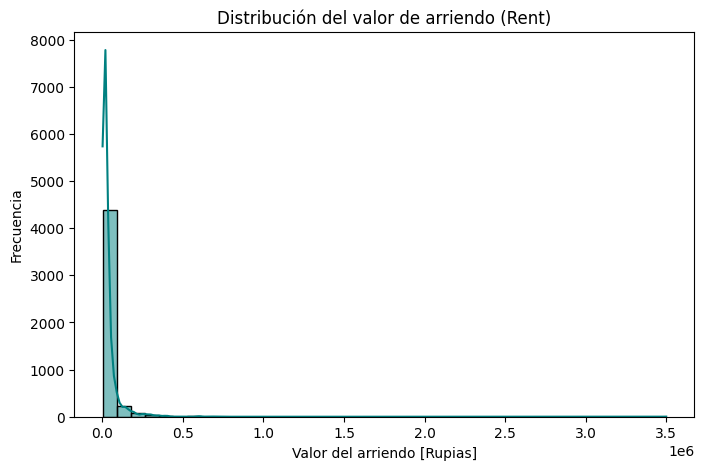

In [ ]:
# Distribución de la variable objetivo (Rent)
plt.figure(figsize=(8,5))
sns.histplot(df["Rent"], bins=40, kde=True, color='teal')
plt.title("Distribución del valor de arriendo (Rent)")
plt.xlabel("Valor del arriendo [Rupias]")
plt.ylabel("Frecuencia")
plt.show()


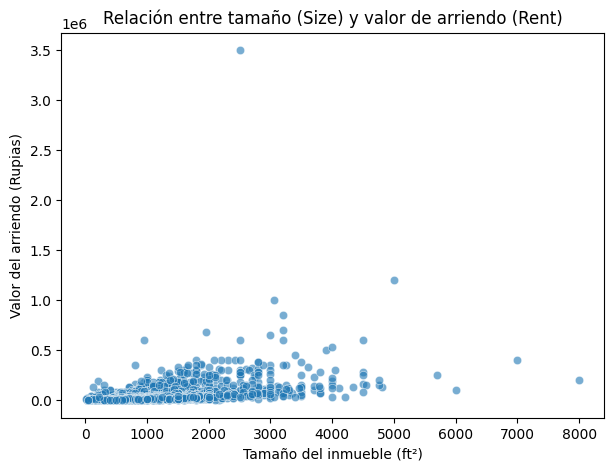

In [ ]:
# Relación entre tamaño y renta
plt.figure(figsize=(7,5))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.6)
plt.title("Relación entre tamaño (Size) y valor de arriendo (Rent)")
plt.xlabel("Tamaño del inmueble (ft²)")
plt.ylabel("Valor del arriendo (Rupias)")
plt.show()


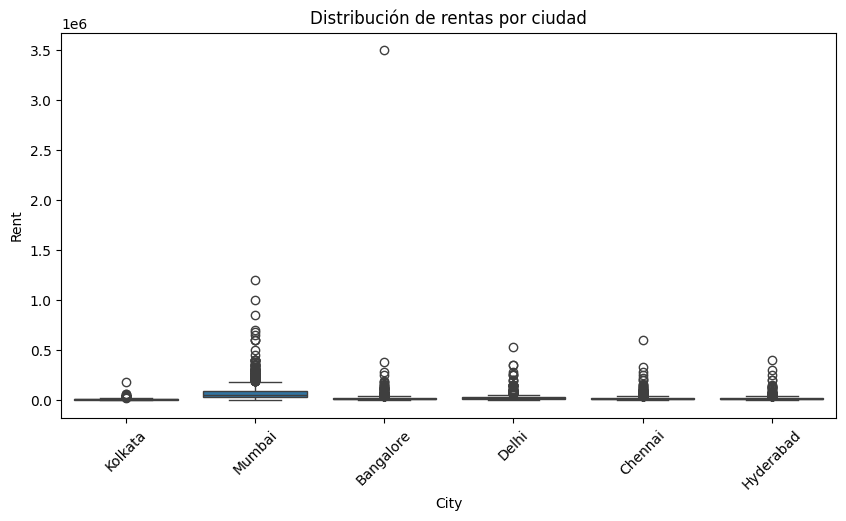

In [ ]:
# Distribución del arriendo por ciudad
plt.figure(figsize=(10,5))
sns.boxplot(x="City", y="Rent", data=df)
plt.title("Distribución de rentas por ciudad")
plt.xticks(rotation=45)
plt.show()


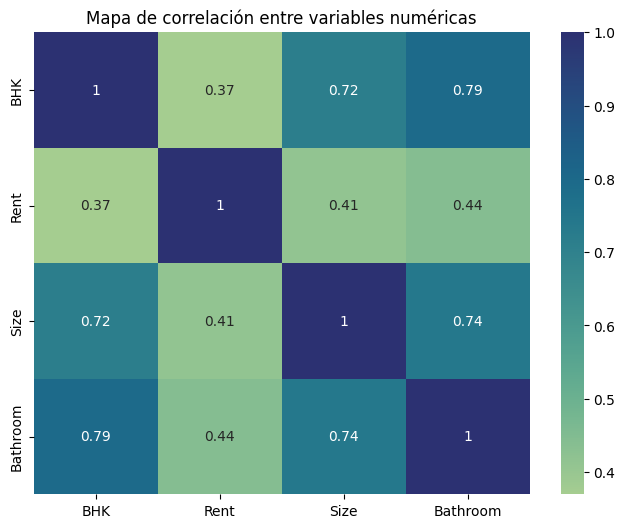

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

# Limpieza de datos

In [ ]:
# Copia del dataset original
data = df.copy()

# Ver columnas y tipos de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# Limpieza básica de columnas de texto
# Eliminar espacios extra y se pone todo en minúsculas para uniformidad
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype(str).str.strip().str.lower()

# Revisar valores únicos en cada columna categórica
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(data[col].unique()[:10])  # muestra los primeros 10 valores únicos



Posted On:
['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23']

Floor:
['ground out of 2' '1 out of 3' '1 out of 2' 'ground out of 1'
 'ground out of 4' '1 out of 4' '1 out of 1' 'ground out of 3'
 '2 out of 3' '4 out of 5']

Area Type:
['super area' 'carpet area' 'built area']

Area Locality:
['bandel' 'phool bagan, kankurgachi' 'salt lake city sector 2'
 'dumdum park' 'south dum dum' 'thakurpukur' 'malancha'
 'palm avenue kolkata, ballygunge' 'natunhat'
 'action area 1, rajarhat newtown']

City:
['kolkata' 'mumbai' 'bangalore' 'delhi' 'chennai' 'hyderabad']

Furnishing Status:
['unfurnished' 'semi-furnished' 'furnished']

Tenant Preferred:
['bachelors/family' 'bachelors' 'family']

Point of Contact:
['contact owner' 'contact agent' 'contact builder']


In [ ]:
# Manejo de columnas especiales

# La columna "Floor" tiene valores tipo "Ground out of 2" o "1 out of 5"
# Extraemos el número del piso actual y el total de pisos
def parse_floor(value):
    try:
        parts = value.split(" out of ")
        current = parts[0].strip().lower()
        total = parts[1].strip().lower() if len(parts) > 1 else current
        if current == "ground":
            current = 0
        elif current == "upper basement":
            current = -1
        elif current == "lower basement":
            current = -2
        else:
            current = int(current)

        if total == "ground":
            total = 0
        total = np.nan if pd.isna(total) else int(total)
        return pd.Series([current, total])

    except:
        return pd.Series([np.nan, np.nan])

data[["Current_Floor", "Total_Floors"]] = data["Floor"].apply(parse_floor)
data.drop(columns=["Floor"], inplace=True)

In [ ]:
data["Posted On"] = pd.to_datetime(data["Posted On"])
data["Posted_Day"] = data["Posted On"].dt.day
data["Posted_Month"] = data["Posted On"].dt.month

data.drop(columns=["Posted On"], inplace=True)


In [ ]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

data = pd.get_dummies(data, columns=cat_cols, drop_first=False)

In [ ]:
locality_counts = data["Area Locality"].value_counts()

locality_counts.describe()

threshold = 20
frequent_localities = locality_counts[locality_counts >= threshold].index
for loc in frequent_localities:
    data[f"Locality_{loc}"] = (data["Area Locality"] == loc).astype(int)

data["Locality_Rare"] = (~data["Area Locality"].isin(frequent_localities)).astype(int)

data.drop(columns=["Area Locality"], inplace=True)


In [ ]:
# Revisar valores faltantes después de la conversión
print("Valores faltantes por columna:\n")
print(data.isnull().sum())
data.info()

Valores faltantes por columna:

BHK                                  0
Rent                                 0
Size                                 0
Bathroom                             0
Current_Floor                        0
Total_Floors                         0
Posted_Day                           0
Posted_Month                         0
Area Type_built area                 0
Area Type_carpet area                0
Area Type_super area                 0
City_bangalore                       0
City_chennai                         0
City_delhi                           0
City_hyderabad                       0
City_kolkata                         0
City_mumbai                          0
Furnishing Status_furnished          0
Furnishing Status_semi-furnished     0
Furnishing Status_unfurnished        0
Tenant Preferred_bachelors           0
Tenant Preferred_bachelors/family    0
Tenant Preferred_family              0
Point of Contact_contact agent       0
Point of Contact_contact builder

In [ ]:
# Comprobamos el resultado
data.head()

,BHK,Rent,Size,Bathroom,Current_Floor,Total_Floors,Posted_Day,Posted_Month,Area Type_built area,Area Type_carpet area,...,Point of Contact_contact agent,Point of Contact_contact builder,Point of Contact_contact owner,Locality_bandra west,Locality_gachibowli,Locality_electronic city,"Locality_miyapur, nh 9",Locality_velachery,Locality_madipakkam,Locality_Rare
0,2,10000,1100,2,0,2,18,5,False,False,...,False,False,True,0,0,0,0,0,0,1
1,2,20000,800,1,1,3,13,5,False,False,...,False,False,True,0,0,0,0,0,0,1
2,2,17000,1000,1,1,3,16,5,False,False,...,False,False,True,0,0,0,0,0,0,1
3,2,10000,800,1,1,2,4,7,False,False,...,False,False,True,0,0,0,0,0,0,1
4,2,7500,850,1,1,2,9,5,False,True,...,False,False,True,0,0,0,0,0,0,1


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BHK,4746.0,NaN,NaN,NaN,2.08386,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,NaN,NaN,NaN,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,NaN,NaN,NaN,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,NaN,NaN,NaN,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0
Current_Floor,4746.0,NaN,NaN,NaN,3.436157,5.77395,-2.0,1.0,2.0,3.0,76.0
Total_Floors,4746.0,NaN,NaN,NaN,6.968605,9.467245,0.0,2.0,4.0,6.0,89.0
Posted_Day,4746.0,NaN,NaN,NaN,15.479562,9.148678,1.0,7.0,14.0,23.0,31.0
Posted_Month,4746.0,NaN,NaN,NaN,5.755794,0.832426,4.0,5.0,6.0,6.0,7.0
Area Type_built area,4746,2,False,4744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Type_carpet area,4746,2,False,2448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar X y y
X = data.drop(columns=["Rent"])
y = data["Rent"]

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (4746, 32)
Shape de y: (4746,)


# Entrenamiento de los Modelos

## Preparación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Intervalo de Confianza

In [ ]:
import numpy as np
import scipy.stats as st

def intervalo_confianza_95(valores):
    """
    Calcula el intervalo de confianza del 95% para un conjunto de valores.
    valores: lista o array (p.ej. MAE de cada fold)
    """
    valores = np.array(valores)
    mean = np.mean(valores)
    sem = st.sem(valores)
    ci = st.t.interval(confidence=0.95, df=len(valores)-1, loc=mean, scale=sem)
    return mean, ci


## Regresión Lineal


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_folds = []
rmse_folds = []

for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]


    model = LinearRegression()
    model.fit(X_tr, y_tr)


    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))

    mae_folds.append(mae)
    rmse_folds.append(rmse)

print("MAE promedio CV:", np.mean(mae_folds))
print("RMSE promedio CV:", np.mean(rmse_folds))



MAE promedio CV: 22002.719279767512
RMSE promedio CV: 59636.34300777239


In [ ]:
mae_mean, mae_ci = intervalo_confianza_95(mae_folds)
rmse_mean, rmse_ci = intervalo_confianza_95(rmse_folds)

print("MAE promedio:", mae_mean)
print("IC95% MAE:", mae_ci)
print("RMSE promedio:", rmse_mean)
print("IC95% RMSE:", rmse_ci)

MAE promedio: 22002.719279767512
IC95% MAE: (np.float64(20738.86848970913), np.float64(23266.570069825895))
RMSE promedio: 59636.34300777239
IC95% RMSE: (np.float64(12075.797753603569), np.float64(107196.8882619412))


In [ ]:
model_final = LinearRegression()
model_final.fit(X_train_scaled, y_train)

y_pred_lr = model_final.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_pred_lr)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_test, rmse_test


(20923.399306981257, np.float64(42633.57724896763))

## Árbol de Decisión


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


param_grid = {
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}


grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=100),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_dt.best_params_)

best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)

mae_final = mean_absolute_error(y_test, y_pred_dt)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"MAE final: {mae_final}")
print(f"RMSE final: {rmse_final}")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores hiperparámetros encontrados:
{'criterion': 'absolute_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
MAE final: 11901.488421052632
RMSE final: 33457.648806112455


In [ ]:
mae_folds_dt = [
    -grid_dt.cv_results_[f"split{i}_test_score"][grid_dt.best_index_]
    for i in range(5)
]

mae_mean_dt, mae_ci_dt = intervalo_confianza_95(mae_folds_dt)

print("Árbol de decisión - MAE promedio:", mae_mean_dt)
print("Árbol de decisión - IC95% MAE:", mae_ci_dt)


Árbol de decisión - MAE promedio: 12699.96051192705
Árbol de decisión - IC95% MAE: (np.float64(9815.955825062356), np.float64(15583.965198791746))


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring=mae_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:")
print(grid_knn.best_params_)


Fitting 5 folds for each of 196 candidates, totalling 980 fits
Mejores hiperparámetros:
{'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}


In [ ]:
mae_folds_knn = [
    -grid_knn.cv_results_[f"split{i}_test_score"][grid_knn.best_index_]
    for i in range(5)
]

mae_mean_knn, mae_ci_knn = intervalo_confianza_95(mae_folds_knn)

print("KNN - MAE promedio:", mae_mean_knn)
print("KNN - IC95% MAE:", mae_ci_knn)


KNN - MAE promedio: 14249.995815909922
KNN - IC95% MAE: (np.float64(10912.900997002935), np.float64(17587.090634816912))


In [ ]:
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)

final_mae_knn = mean_absolute_error(y_test, y_pred_knn)
final_rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("MAE final:", final_mae_knn)
print("RMSE final:", final_rmse_knn)



MAE final: 13798.869157959383
RMSE final: 42808.96940942702


## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

param_grid = {
    "C": [1, 10, 50, 100],
    "gamma": ["scale", "auto", 0.01, 0.001],
    "epsilon": [0.1, 0.2, 1, 5]
}

svr = SVR(kernel="rbf")

grid = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Mejores parámetros encontrados:")
print(grid.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores parámetros encontrados:
{'C': 100, 'epsilon': 5, 'gamma': 'scale'}


In [ ]:
mae_folds_svr = [
    -grid.cv_results_[f"split{i}_test_score"][grid.best_index_]
    for i in range(5)
]

mae_mean_svr, mae_ci_svr = intervalo_confianza_95(mae_folds_svr)

print("SVM - MAE promedio:", mae_mean_svr)
print("SVM - IC95% MAE:", mae_ci_svr)


SVM - MAE promedio: 20406.79224599771
SVM - IC95% MAE: (np.float64(16110.502222298503), np.float64(24703.082269696915))


In [ ]:
best_svr = grid.best_estimator_

y_pred_svr = best_svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 19181.43029353682
RMSE: 61041.819710052216


## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "gamma": [0, 1],
}


In [ ]:
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)


In [ ]:
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Mejores parámetros XGBoost:")
print(grid_xgb.best_params_)


Mejores parámetros XGBoost:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}


In [ ]:
mae_folds_xgb = [
    -grid_xgb.cv_results_[f"split{i}_test_score"][grid_xgb.best_index_]
    for i in range(5)
]

mae_mean_xgb, mae_ci_xgb = intervalo_confianza_95(mae_folds_xgb)

print("XGBoost - MAE promedio:", mae_mean_xgb)
print("XGBoost - IC95% MAE:", mae_ci_xgb)


XGBoost - MAE promedio: 13421.1990234375
XGBoost - IC95% MAE: (np.float64(11179.221217504308), np.float64(15663.176829370694))


In [ ]:
best_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("MAE final XGBoost:", mae_xgb)
print("RMSE final XGBoost:", rmse_xgb)


MAE final XGBoost: 13116.6171875
RMSE final XGBoost: 45779.82927010541


## Red Neuronal

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50,50), (100,50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "learning_rate_init": [0.001, 0.01],
    "alpha": [0.0001, 0.001, 0.01]
}


In [ ]:
mlp = MLPRegressor(
    max_iter=500,
    early_stopping=True,
    random_state=42
)


In [ ]:
grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_mlp.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=500,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam']},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_mlp.best_params_)

Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [ ]:
mae_folds_mlp = [
    -grid_mlp.cv_results_[f"split{i}_test_score"][grid_mlp.best_index_]
    for i in range(5)
]

mae_mean_mlp, mae_ci_mlp = intervalo_confianza_95(mae_folds_mlp)

print("MLP - MAE promedio:", mae_mean_mlp)
print("MLP - IC95% MAE:", mae_ci_mlp)


MLP - MAE promedio: 15731.54533597824
MLP - IC95% MAE: (np.float64(12901.49570160076), np.float64(18561.594970355723))


In [ ]:
best_mlp = grid_mlp.best_estimator_

y_pred_mlp = best_mlp.predict(X_test_scaled)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

print("MAE MLP:", mae_mlp)
print("RMSE MLP:", rmse_mlp)


MAE MLP: 16858.46938942606
RMSE MLP: 40944.49327201816


# Evaluación de Resultados

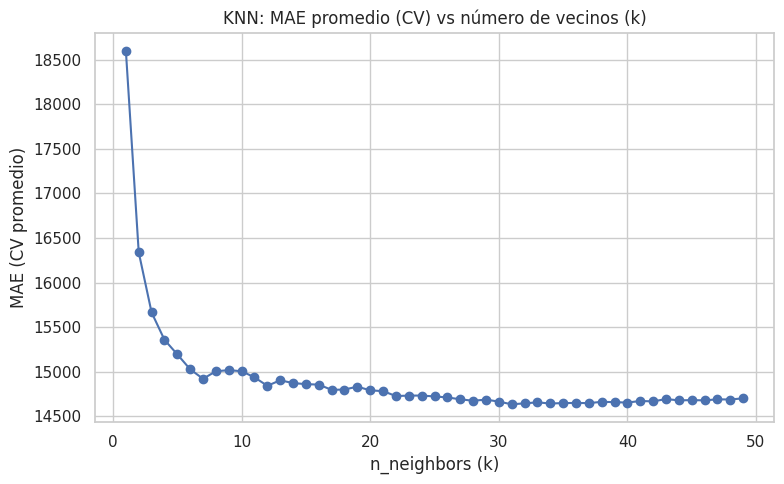

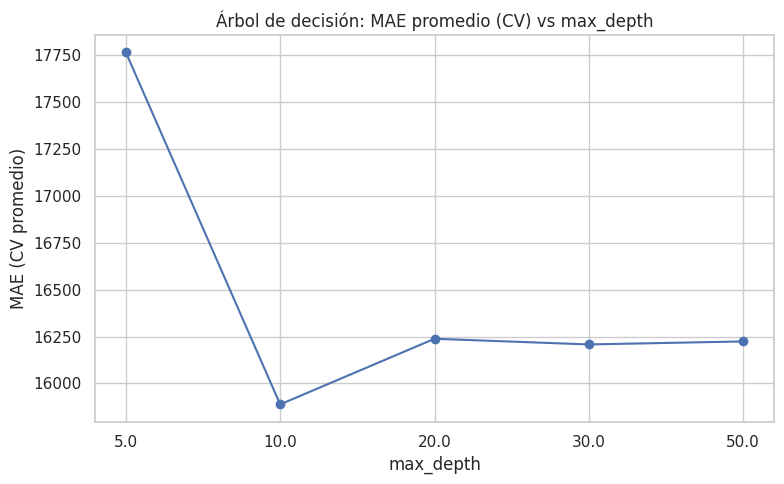

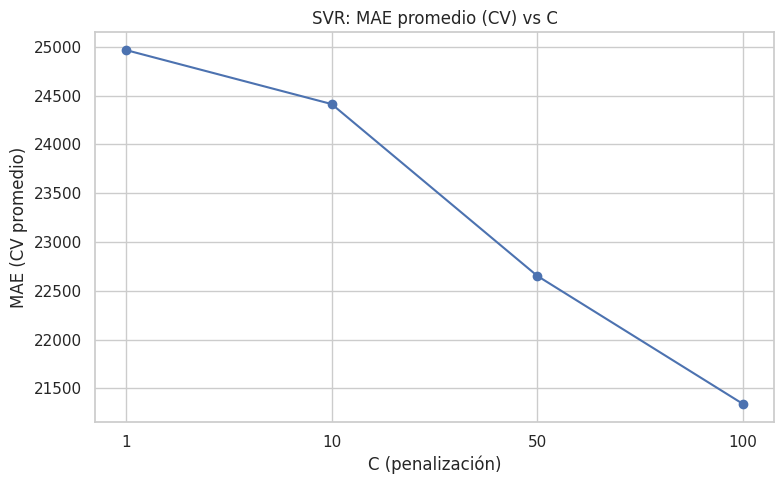

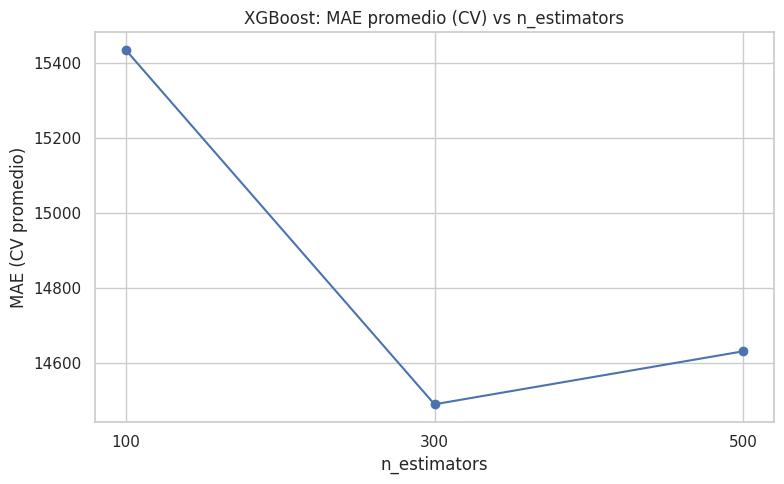

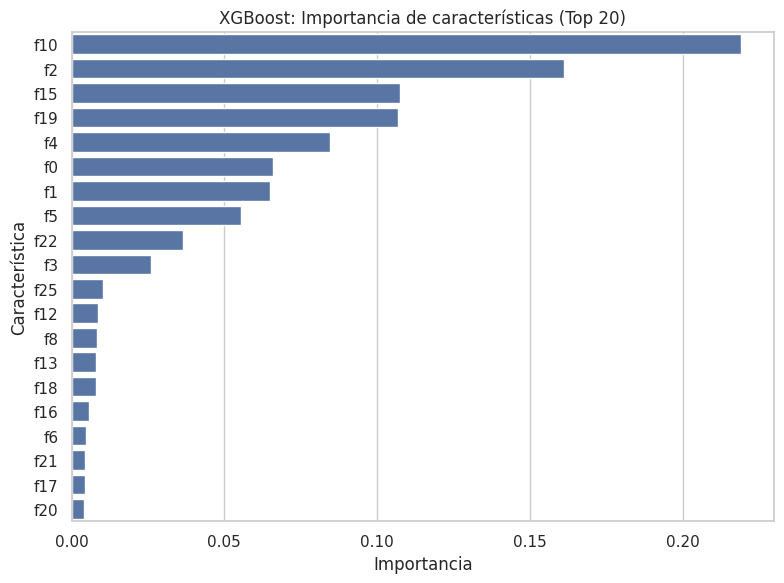

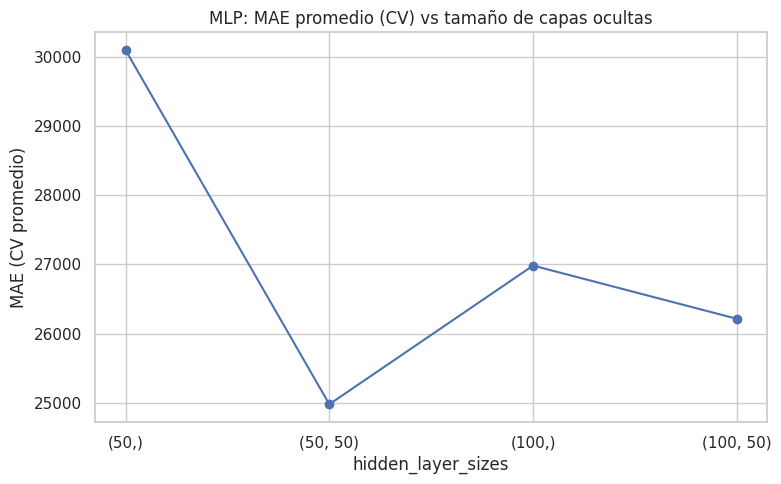

No se pudieron obtener MAE por fold para Regresión Lineal. Se usará MAE puntual si existe.


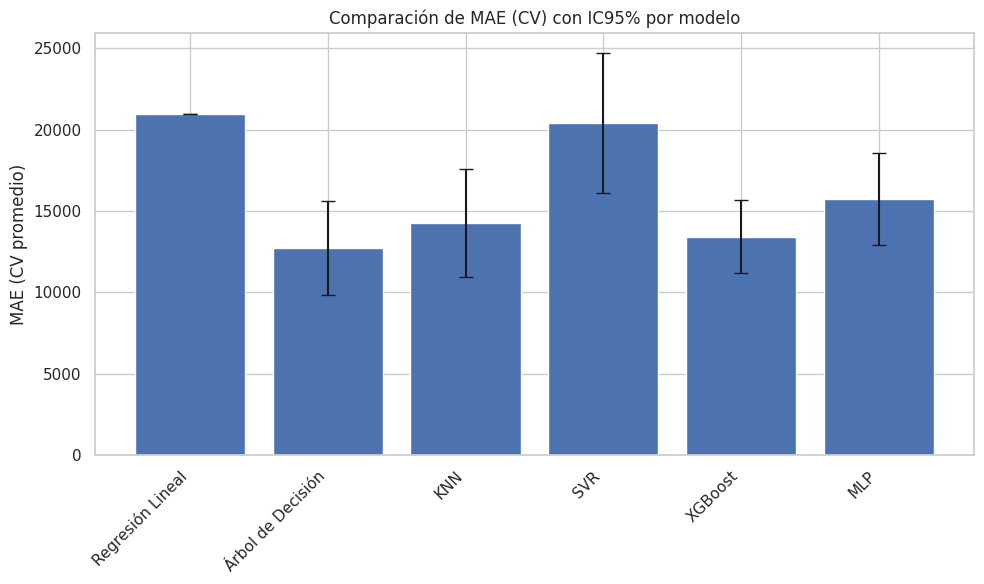

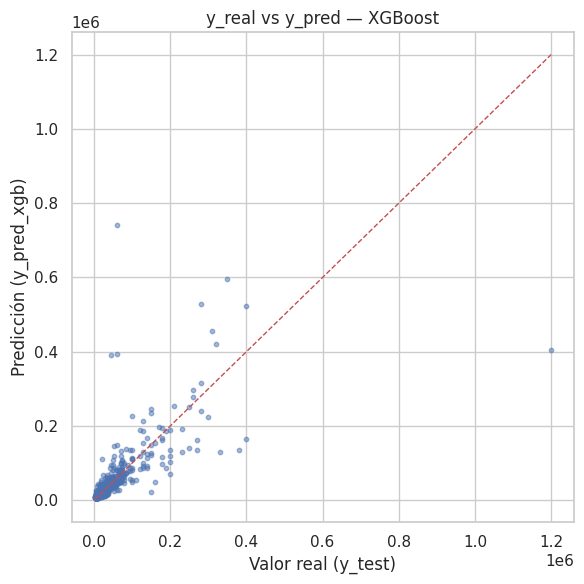

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

def intervalo_confianza_95(valores):
    """
    Retorna (mean, (ci_low, ci_high)) usando t-distribution.
    valores: lista/array de observaciones (p.ej. MAE por fold)
    """
    valores = np.array(valores, dtype=float)
    mean = np.mean(valores)
    if len(valores) < 2:
        return mean, (mean, mean)
    sem = st.sem(valores)
    ci = st.t.interval(confidence=0.95, df=len(valores)-1, loc=mean, scale=sem)
    return mean, ci

def mae_folds_from_grid(grid):
    """
    Devuelve lista de MAE por fold (obtenida desde grid.cv_results_ en la fila best_index_).
    Asume scoring negativo MAE (neg_mean_absolute_error).
    """
    cv = grid.cv if hasattr(grid, "cv") else 5
    best_idx = grid.best_index_
    scores = []
    for i in range(cv):
        key = f"split{i}_test_score"
        if key in grid.cv_results_:
            scores.append(-grid.cv_results_[key][best_idx])
        else:
            # fallback: use mean_test_score if per-split unavailable
            scores.append(-grid.cv_results_['mean_test_score'][best_idx])
    return scores

def param_mean_scores(grid, param_name):
    """
    Construye (param_values, mean_scores) a partir de grid.cv_results_.
    Devuelve valores de param como lista ordenada y sus mean_test_score (positivizados MAE).
    """
    results = grid.cv_results_
    params = results['params']
    mean_scores = -np.array(results['mean_test_score'])  # scoring negativo -> convertir
    param_values = [p[param_name] for p in params]
    # Agrupar por valor y promediar
    df = pd.DataFrame({param_name: param_values, 'mean_score': mean_scores})
    agg = df.groupby(param_name)['mean_score'].mean().reset_index()
    agg = agg.sort_values(by=param_name, key=lambda col: col.map(lambda x: float('inf') if x is None else x))
    return list(agg[param_name].values), list(agg['mean_score'].values)

# ----------------------------
# Asumimos que las predicciones finales existen como:
# y_pred_lr, y_pred_dt, y_pred_knn, y_pred_svr, y_pred_xgb, y_pred_mlp
# y que y_test existe como vector 1D.
# También asumimos que los objetos GridSearchCV existen con los nombres usados antes:
# grid_dt, grid_knn, grid (SVR), grid_xgb, grid_mlp
# ----------------------------

# ----------------------------
# 1) Gráfica KNN: MAE vs n_neighbors (usando grid_knn si existe)
# ----------------------------
try:
    # Extraer MAE por valor de n_neighbors desde grid_knn
    if 'grid_knn' in globals():
        ks, mae_vals = param_mean_scores(grid_knn, 'n_neighbors')
        plt.figure(figsize=(8,5))
        plt.plot(ks, mae_vals, marker='o')
        plt.xlabel('n_neighbors (k)')
        plt.ylabel('MAE (CV promedio)')
        plt.title('KNN: MAE promedio (CV) vs número de vecinos (k)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("grid_knn no encontrado — si no usaste GridSearchCV, proporciona array de errores por k.")
except Exception as e:
    print("Error generando gráfica KNN:", e)

# ----------------------------
# 2) Árbol de decisión: MAE vs max_depth
# ----------------------------
try:
    if 'grid_dt' in globals():
        # Obtener (max_depth, mean_score)
        depths, mae_depth = param_mean_scores(grid_dt, 'max_depth')
        # Convertir None a string para plotting ordenado
        depths_plot = ['None' if d is None else str(d) for d in depths]
        plt.figure(figsize=(8,5))
        plt.plot(depths_plot, mae_depth, marker='o')
        plt.xlabel('max_depth')
        plt.ylabel('MAE (CV promedio)')
        plt.title('Árbol de decisión: MAE promedio (CV) vs max_depth')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("grid_dt no encontrado — imposible graficar efecto de max_depth.")
except Exception as e:
    print("Error generando gráfica Árbol de Decisión:", e)

# ----------------------------
# 3) SVR: MAE vs C (param C)
# ----------------------------
try:
    if 'grid' in globals():  # asumimos que 'grid' es el GridSearchCV del SVR como en tu código
        Cs, mae_C = param_mean_scores(grid, 'C')
        plt.figure(figsize=(8,5))
        plt.plot([str(c) for c in Cs], mae_C, marker='o')
        plt.xlabel('C (penalización)')
        plt.ylabel('MAE (CV promedio)')
        plt.title('SVR: MAE promedio (CV) vs C')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("GridSearchCV del SVR no encontrado (variable 'grid').")
except Exception as e:
    print("Error generando gráfica SVR:", e)

# ----------------------------
# 4) XGBoost: MAE vs n_estimators + feature importance
# ----------------------------
try:
    if 'grid_xgb' in globals():
        n_est, mae_n = param_mean_scores(grid_xgb, 'n_estimators')
        # Plot MAE vs n_estimators
        plt.figure(figsize=(8,5))
        plt.plot([str(n) for n in n_est], mae_n, marker='o')
        plt.xlabel('n_estimators')
        plt.ylabel('MAE (CV promedio)')
        plt.title('XGBoost: MAE promedio (CV) vs n_estimators')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Feature importance (del mejor estimador)
        try:
            best_xgb = grid_xgb.best_estimator_
            fi = best_xgb.feature_importances_
            # Intentar conseguir nombres de features si X_train_raw es DataFrame
            if isinstance(globals().get('X_train_raw', None), pd.DataFrame):
                feat_names = X_train_raw.columns
            else:
                feat_names = [f"f{i}" for i in range(len(fi))]
            fi_df = pd.DataFrame({'feature': feat_names, 'importance': fi})
            fi_df = fi_df.sort_values('importance', ascending=False).head(20)
            plt.figure(figsize=(8,6))
            sns.barplot(x='importance', y='feature', data=fi_df, orient='h')
            plt.title('XGBoost: Importancia de características (Top 20)')
            plt.xlabel('Importancia')
            plt.ylabel('Característica')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print("Error calculando/importando importancia de features XGBoost:", e)
    else:
        print("grid_xgb no encontrado — no se puede graficar XGBoost.")
except Exception as e:
    print("Error generando gráfica XGBoost:", e)

# ----------------------------
# 5) MLP: MAE vs hidden_layer_sizes
# ----------------------------
try:
    if 'grid_mlp' in globals():
        hls, mae_hls = param_mean_scores(grid_mlp, 'hidden_layer_sizes')
        # For plotting, convert tuples to strings
        hls_str = [str(h) for h in hls]
        plt.figure(figsize=(8,5))
        plt.plot(hls_str, mae_hls, marker='o')
        plt.xlabel('hidden_layer_sizes')
        plt.ylabel('MAE (CV promedio)')
        plt.title('MLP: MAE promedio (CV) vs tamaño de capas ocultas')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("grid_mlp no encontrado — no se puede graficar MLP.")
except Exception as e:
    print("Error generando gráfica MLP:", e)

# ----------------------------
# 6) Comparación final: MAE (CV) con IC95% por modelo y barras de error
# ----------------------------
models_info = []
# Helper to try to obtain mae_folds for each model (priority: mae_folds_* variable, else from grid)
def obtain_mae_folds_for_model(name, grid_var_name):
    # try mae_folds_* variable first
    var_name = f"mae_folds_{name}"
    if var_name in globals():
        return globals()[var_name]
    # else try grid object
    if grid_var_name in globals():
        return mae_folds_from_grid(globals()[grid_var_name])
    # else try to compute from per-fold arrays if present
    return None

# List of models to compare: (label, grid_var_name, y_pred_var)
compare_models = [
    ('Regresión Lineal', None, 'y_pred_lr'),
    ('Árbol de Decisión', 'grid_dt', 'y_pred_dt'),
    ('KNN', 'grid_knn', 'y_pred_knn'),
    ('SVR', 'grid', 'y_pred_svr'),
    ('XGBoost', 'grid_xgb', 'y_pred_xgb'),
    ('MLP', 'grid_mlp', 'y_pred_mlp'),
]

for label, grid_var, ypred_var in compare_models:
    # Try fold MAE
    name_key = label.lower().replace(' ', '_').replace('á','a').replace('ó','o')
    mae_folds = None
    if label == 'Regresión Lineal':
        if 'mae_folds' in globals():      # if you used mae_folds from manual CV
            mae_folds = globals()['mae_folds']
    else:
        mae_folds = obtain_mae_folds_for_model(name_key, grid_var)
    if mae_folds is None:
        # As last resort compute MAE per fold approximating via repeated subsampling (fallback)
        # We'll compute a single MAE on train CV splits if grid not available -- skip for now
        print(f"No se pudieron obtener MAE por fold para {label}. Se usará MAE puntual si existe.")
        # Try single MAE from predictions if y_pred exists
        if ypred_var in globals() and 'y_test' in globals():
            mae_val = mean_absolute_error(y_test, globals()[ypred_var])
            models_info.append((label, mae_val, mae_val, mae_val))
        else:
            models_info.append((label, np.nan, np.nan, np.nan))
    else:
        mean_mae, ci = intervalo_confianza_95(mae_folds)
        models_info.append((label, mean_mae, ci[0], ci[1]))

# Plot comparison
labels = [m[0] for m in models_info]
mae_means = np.array([m[1] for m in models_info], dtype=float)
ci_lowers = np.array([m[1]-m[2] for m in models_info], dtype=float)  # mean - lower
ci_uppers = np.array([m[3]-m[1] for m in models_info], dtype=float)  # upper - mean

plt.figure(figsize=(10,6))
plt.bar(range(len(labels)), mae_means, yerr=[ci_lowers, ci_uppers], capsize=5)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('MAE (CV promedio)')
plt.title('Comparación de MAE (CV) con IC95% por modelo')
plt.tight_layout()
plt.show()

# ----------------------------
# 7) Scatter: y_test vs y_pred_xgb (mejor modelo)
# ----------------------------
try:
    if 'y_pred_xgb' in globals() and 'y_test' in globals():
        plt.figure(figsize=(6,6))
        plt.scatter(y_test, y_pred_xgb, alpha=0.5, s=10)
        # plot diagonal
        minv = min(np.min(y_test), np.min(y_pred_xgb))
        maxv = max(np.max(y_test), np.max(y_pred_xgb))
        plt.plot([minv, maxv], [minv, maxv], 'r--', linewidth=1)
        plt.xlabel('Valor real (y_test)')
        plt.ylabel('Predicción (y_pred_xgb)')
        plt.title('y_real vs y_pred — XGBoost')
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron y_pred_xgb o y_test para el scatter plot.")
except Exception as e:
    print("Error generando scatter y_test vs y_pred_xgb:", e)

# ----------------------------
# Fin del script de gráficas
# ----------------------------


# Reducción de Dimensión

## Árbol de Decisión

In [ ]:
# ANÁLISIS INDIVIDUAL DE VARIABLES

from sklearn.base import clone

# Correlación con el target
correlations = pd.DataFrame({
    "feature": X.columns,
    "corr_target": [np.corrcoef(X[col], y)[0, 1] for col in X.columns]
}).sort_values(by="corr_target", key=lambda x: abs(x), ascending=False)

print("\n CORRELACIONES INDIVIDUALES")
print(correlations)

# Importancia del árbol
temp_tree = clone(best_dt)
temp_tree.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": temp_tree.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\n Importancia de características según Árbol de Decisión")
print(feature_importances)

# Identificar posibles variables a eliminar
low_corr = correlations[abs(correlations["corr_target"]) < 0.05]["feature"].tolist()
low_importance = feature_importances[feature_importances["importance"] < 0.01]["feature"].tolist()

candidates_to_drop = list(set(low_corr + low_importance))

print("\n Variables candidatas a eliminación")
print(candidates_to_drop)


 CORRELACIONES INDIVIDUALES
                              feature  corr_target
2                            Bathroom     0.441215
1                                Size     0.413551
0                                 BHK     0.369718
4                        Total_Floors     0.352268
22     Point of Contact_contact agent     0.339750
24     Point of Contact_contact owner    -0.339521
15                        City_mumbai     0.327038
3                       Current_Floor     0.326200
8               Area Type_carpet area     0.215769
9                Area Type_super area    -0.215499
25               Locality_bandra west     0.163355
18      Furnishing Status_unfurnished    -0.126271
16        Furnishing Status_furnished     0.110576
14                       City_kolkata    -0.105322
6                        Posted_Month     0.101925
13                     City_hyderabad    -0.087465
11                       City_chennai    -0.082361
20  Tenant Preferred_bachelors/family    -0.078774
21

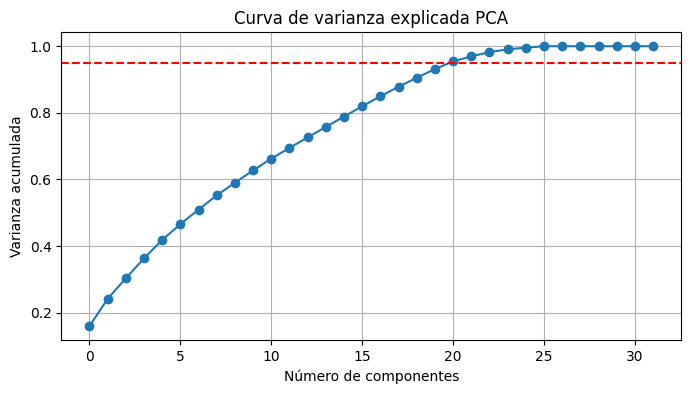

In [ ]:
# SELECCIÓN DE COMPONENTES

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca_temp = PCA().fit(X_train_scaled)

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_), marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Curva de varianza explicada PCA")
plt.grid(True)
plt.show()

### PCA

In [ ]:
# ÁRBOL DE DECISIÓN CON PCA

from sklearn.pipeline import Pipeline
from sklearn.base import clone

pca_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),   # ajustar según tu curva
    ('tree', clone(best_dt))
])

pca_dt.fit(X_train, y_train)
y_pred_pca = pca_dt.predict(X_test)

mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("\nMAE con PCA:", mae_pca)
print("RMSE con PCA:", rmse_pca)


MAE con PCA: 14625.567368421052
RMSE con PCA: 46378.240061851604


In [ ]:
# TABLA COMPARATIVA ANTES-DESPUÉS DE PCA

tabla_comparativa = pd.DataFrame({
    "Modelo": ["Árbol sin PCA", "Árbol con PCA"],
    "MAE": [mae_final, mae_pca],
    "RMSE": [rmse_final, rmse_pca]
})

print(tabla_comparativa)


          Modelo           MAE          RMSE
0  Árbol sin PCA  11901.488421  33457.648806
1  Árbol con PCA  14625.567368  46378.240062


### UMAP

In [ ]:
!pip install umap-learn

import umap
from sklearn.pipeline import Pipeline
from sklearn.base import clone

n_components_umap = 2

umap_dt = Pipeline([
    ('scaler', StandardScaler()),  # opcional pero recomendable
    ('umap', umap.UMAP(
        n_components=n_components_umap,
        n_neighbors=15,     # hiperparámetro clave de UMAP
        min_dist=0.1,       # separabilidad
        random_state=100
    )),
    ('tree', clone(best_dt))
])

In [ ]:
# ÁRBOL CON UMAP

umap_dt.fit(X_train, y_train)
y_pred_umap = umap_dt.predict(X_test)

mae_umap = mean_absolute_error(y_test, y_pred_umap)
rmse_umap = np.sqrt(mean_squared_error(y_test, y_pred_umap))

print("\nMAE con UMAP:", mae_umap)
print("RMSE con UMAP:", rmse_umap)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



MAE con UMAP: 18037.31263157895
RMSE con UMAP: 51723.224746773696


In [ ]:
# TABLA COMPARATIVA MODELO ANTES-DESPUÉS UMAP

tabla_umap = pd.DataFrame({
    "Modelo": ["Árbol sin reducción", "Árbol con UMAP"],
    "MAE": [mae_final, mae_umap],
    "RMSE": [rmse_final, rmse_umap]
})

print(tabla_umap)

                Modelo           MAE          RMSE
0  Árbol sin reducción  11901.488421  33457.648806
1       Árbol con UMAP  18037.312632  51723.224747


## XGBoost

### UMAP

--- INICIANDO REDUCCIÓN CON UMAP + MEJORES PARÁMETROS ---
Reduciendo datos de 32 columnas a 5 componentes...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Entrenando modelo optimizado...

RESULTADOS XGBOOST OPTIMIZADO CON UMAP (5 dim)
MAE (Error Absoluto Medio): 17695.31
RMSE (Raíz Error Cuadrático): 44460.79


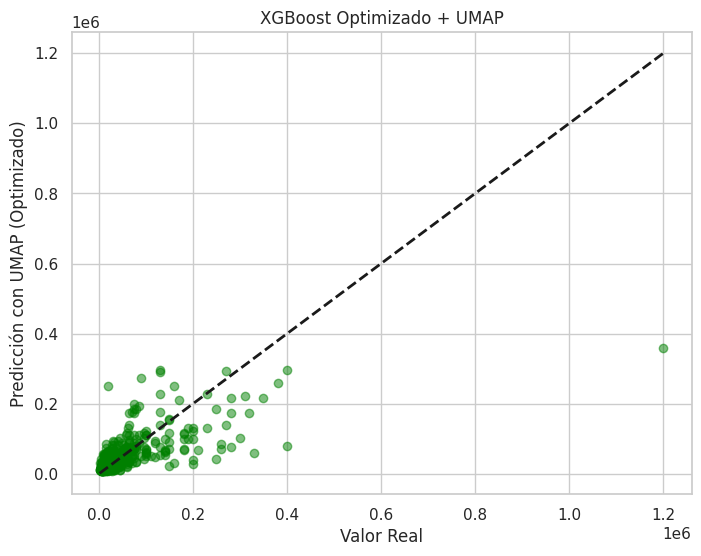

In [ ]:
# ---UMAP (REDUCCIÓN NO LINEAL) ---

!pip install umap-learn


import umap
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

print("--- INICIANDO REDUCCIÓN CON UMAP + MEJORES PARÁMETROS ---")

# Configuración: Reducir a 5 componentes
n_componentes = 5

# 1. Crear el reductor UMAP
# Mantenemos la semilla (random_state) para que sea reproducible
reducer = umap.UMAP(n_components=n_componentes, n_neighbors=15, min_dist=0.1, random_state=42)

# 2. Transformar los datos (Asumimos que X_train_scaled y X_test_scaled existen)
print(f"Reduciendo datos de {X_train_scaled.shape[1]} columnas a {n_componentes} componentes...")
X_train_umap = reducer.fit_transform(X_train_scaled)
X_test_umap = reducer.transform(X_test_scaled)

# 3. Entrenar XGBoost con los MEJORES PARÁMETROS que te dio tu compañero
print("Entrenando modelo optimizado...")
model_xgb_umap = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    # AQUÍ ESTÁN LOS AJUSTES DE TU COMPAÑERO:
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    subsample=0.9
)

model_xgb_umap.fit(X_train_umap, y_train)

# 4. Hacer predicciones
y_pred_xgb_umap = model_xgb_umap.predict(X_test_umap)

# 5. Evaluar resultados
mae_umap = mean_absolute_error(y_test, y_pred_xgb_umap)
rmse_umap = np.sqrt(mean_squared_error(y_test, y_pred_xgb_umap))

print("\n" + "="*50)
print(f"RESULTADOS XGBOOST OPTIMIZADO CON UMAP ({n_componentes} dim)")
print("="*50)
print(f"MAE (Error Absoluto Medio): {mae_umap:.2f}")
print(f"RMSE (Raíz Error Cuadrático): {rmse_umap:.2f}")

# 6. Gráfica
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_umap, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción con UMAP (Optimizado)')
plt.title(f'XGBoost Optimizado + UMAP')
plt.show()

### PCA

--- INICIANDO REDUCCIÓN CON PCA (Lineal) PARA XGBOOST ---
Reduciendo datos de 32 columnas a 5 componentes usando PCA...

Entrenando XGBoost con datos de PCA...

RESULTADOS XGBOOST CON PCA (5 componentes)
MAE (Error Absoluto Medio): 14386.98
RMSE (Raíz Error Cuadrático): 43591.51


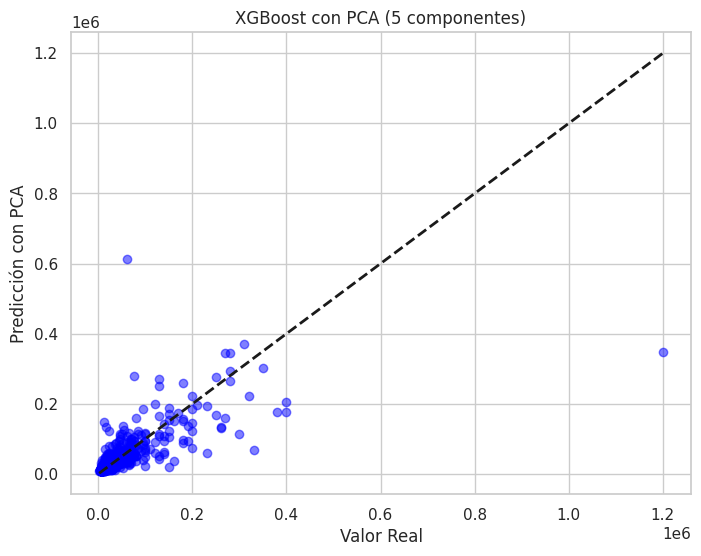

In [ ]:
# --- SECCIÓN 5.2: PCA (REDUCCIÓN LINEAL) - SOLO XGBOOST ---
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

print("--- INICIANDO REDUCCIÓN CON PCA (Lineal) PARA XGBOOST ---")

# Vamos a reducir a 5 componentes
n_componentes = 5

# 1. Aplicar PCA
pca = PCA(n_components=n_componentes, random_state=42)
print(f"Reduciendo datos de {X_train_scaled.shape[1]} columnas a {n_componentes} componentes usando PCA...")

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 2. Entrenar XGBoost con los MEJORES PARÁMETROS (mismos de antes)
print("\nEntrenando XGBoost con datos de PCA...")
model_xgb_pca = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    colsample_bytree=1.0, gamma=0, learning_rate=0.01,
    max_depth=5, n_estimators=500, subsample=0.9
)
model_xgb_pca.fit(X_train_pca, y_train)

# 3. Predicciones y Evaluación
y_pred_xgb_pca = model_xgb_pca.predict(X_test_pca)

mae_xgb_pca = mean_absolute_error(y_test, y_pred_xgb_pca)
rmse_xgb_pca = np.sqrt(mean_squared_error(y_test, y_pred_xgb_pca))

# 4. Mostrar Resultados
print("\n" + "="*50)
print(f"RESULTADOS XGBOOST CON PCA ({n_componentes} componentes)")
print("="*50)
print(f"MAE (Error Absoluto Medio): {mae_xgb_pca:.2f}")
print(f"RMSE (Raíz Error Cuadrático): {rmse_xgb_pca:.2f}")

# 5. Gráfica Única (XGBoost con PCA)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_pca, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción con PCA')
plt.title(f'XGBoost con PCA (5 componentes)')
plt.show()

### Comparación

In [ ]:
###Tabla comparativa XGBoost

import pandas as pd
from IPython.display import display

# --- 1. DATOS DE TUS RESULTADOS (XGBoost Solamente) ---
# Estos son los números exactos que obtuviste en los pasos anteriores
mae_orig = 13116.62   # Resultado de tus compañeros
rmse_orig = 45779.83

mae_pca = 14386.98    # Tu resultado Sección 5.2
rmse_pca = 43591.51

mae_umap = 17695.31   # Tu resultado Sección 5.3
rmse_umap = 44460.79

# --- TABLA 1: EVOLUCIÓN DEL MODELO XGBOOST ---
# Muestra cómo cambia el error al quitar variables
print("\n" + "="*40)
print("TABLA 1: IMPACTO DE LA REDUCCIÓN DE DIMENSIÓN (XGBOOST)")
print("="*40)

data_evolution = {
    'Escenario': ['XGBoost Original', 'XGBoost + PCA', 'XGBoost + UMAP'],
    'Variables': [32, 5, 5],
    'Técnica': ['Base', 'Lineal', 'No Lineal'],
    'MAE (Error)': [mae_orig, mae_pca, mae_umap],
    'RMSE': [rmse_orig, rmse_pca, rmse_umap]
}

df_evo = pd.DataFrame(data_evolution)

# Calcular diferencia porcentual del MAE respecto al original
# Fórmula: ((Nuevo - Viejo) / Viejo) * 100
df_evo['Diferencia Error (%)'] = df_evo['MAE (Error)'].apply(
    lambda x: f"+{((x - mae_orig) / mae_orig) * 100:.2f}%" if x != mae_orig else "Referencia"
)

display(df_evo)

# --- TABLA 2: CONCLUSIÓN FINAL (PCA VS UMAP) ---
# Resume cuál técnica ganó para tu modelo
print("\n" + "="*40)
print("TABLA 2: COMPARATIVA FINAL DE TÉCNICAS")
print("="*40)

data_compare = {
    'Técnica Reducción': ['PCA (Lineal)', 'UMAP (No Lineal)'],
    'MAE Resultante': [mae_pca, mae_umap],
    'Pérdida de Precisión': [
        f"+{((mae_pca - mae_orig) / mae_orig) * 100:.1f}%",
        f"+{((mae_umap - mae_orig) / mae_orig) * 100:.1f}%"
    ],
    'Evaluación': ['✅ MEJOR OPCIÓN', '❌ Menor desempeño']
}

df_compare = pd.DataFrame(data_compare)
display(df_compare)


TABLA 1: IMPACTO DE LA REDUCCIÓN DE DIMENSIÓN (XGBOOST)


,Escenario,Variables,Técnica,MAE (Error),RMSE,Diferencia Error (%)
0,XGBoost Original,32,Base,13116.62,45779.83,Referencia
1,XGBoost + PCA,5,Lineal,14386.98,43591.51,+9.69%
2,XGBoost + UMAP,5,No Lineal,17695.31,44460.79,+34.91%



TABLA 2: COMPARATIVA FINAL DE TÉCNICAS


,Técnica Reducción,MAE Resultante,Pérdida de Precisión,Evaluación
0,PCA (Lineal),14386.98,+9.7%,✅ MEJOR OPCIÓN
1,UMAP (No Lineal),17695.31,+34.9%,❌ Menor desempeño
